In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D


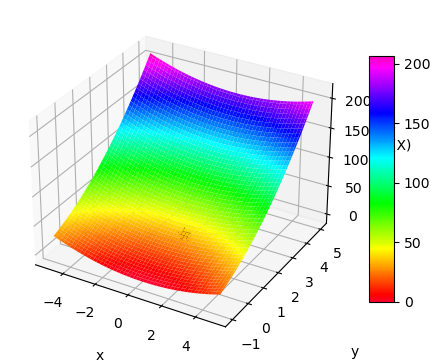

In [7]:
#Surface Plot
e =lambda x, y: x**2-x + 3*y**2 + 18*y + 14
x = np.linspace(-5,5,100)
y = np.linspace(-1,5,100)

X, Y = np.meshgrid(x,y)
F = e(X,Y)

fig = plt.figure(figsize=(12,8))
ax = plt.subplot(1,2,1,projection='3d') # set up the axis as a 3D plot
ax.scatter3D(1,1,e(1,1),c="black",marker="*",s=100)
surf = ax.plot_surface(X,Y,F, cmap= 'gist_rainbow')
fig.colorbar(surf,shrink=0.4, aspect=10)
# set axes label
ax.set_xlabel('x', labelpad=10)
ax.set_ylabel('y', labelpad=30)
ax.set_zlabel('f(X)', labelpad=10)

plt.show()


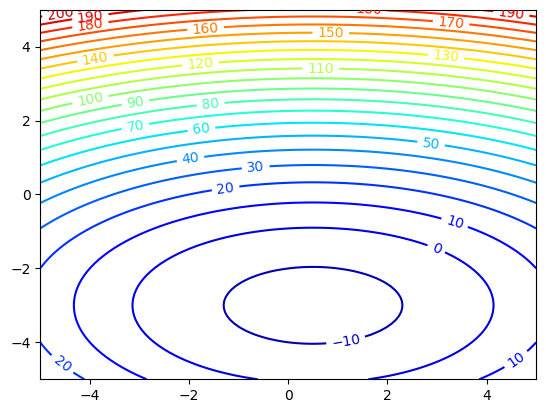

In [6]:
#contour plot
e =lambda x, y: x**2-x + 3*y**2 + 18*y + 14

x = np.linspace(-5,5,100)
y = np.linspace(-5,5,100)

x, y = np.meshgrid(x,y)
F = e(x,y)
N=25 # number of levels
cp = plt.contour(x,y,F,N,cmap='jet')
plt.clabel(cp)

plt.show()

In [10]:
# minimize function without constraints

e =lambda x: x[0]**2-x[0] + 3*x[1]**2 + 18*x[1] + 14
x0 = [1.5,3] #initial guess
res = minimize(e,x0)
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -13.249999999999872
        x: [ 5.000e-01 -3.000e+00]
      nit: 7
      jac: [ 0.000e+00  1.192e-06]
 hess_inv: [[ 5.001e-01 -4.182e-04]
            [-4.182e-04  1.696e-01]]
     nfev: 24
     njev: 8

In [11]:
# minimize function with constraints

f = lambda x: x[0]**2 +x[1]**3 - 2*x[0]*x[1]
cons = ({'type': 'ineq','fun': lambda x: 2*x[0]+x[1]-5}, # All constraints are greater than type
        {'type': 'eq','fun': lambda x: 3*x[0]+x[1]-2}, # All constraints are greater than type
        )

bnds = ((0,None),(0,None)) 

x0 = (1.3,2)
res = minimize(f,x0, bounds=bnds, constraints= cons)

res2 = minimize(f,x0)
res2

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.14814814814811317
        x: [ 6.667e-01  6.667e-01]
      nit: 9
      jac: [-1.192e-07 -1.937e-07]
 hess_inv: [[ 9.673e-01  4.763e-01]
            [ 4.763e-01  4.828e-01]]
     nfev: 30
     njev: 10

In [14]:
res = minimize(e,x0,bounds=bnds,constraints=cons)
res

 message: Positive directional derivative for linesearch
 success: False
  status: 8
     fun: 165.8382909706982
       x: [ 5.619e-17  4.721e+00]
     nit: 9
     jac: [-1.000e+00  4.633e+01]
    nfev: 45
    njev: 5

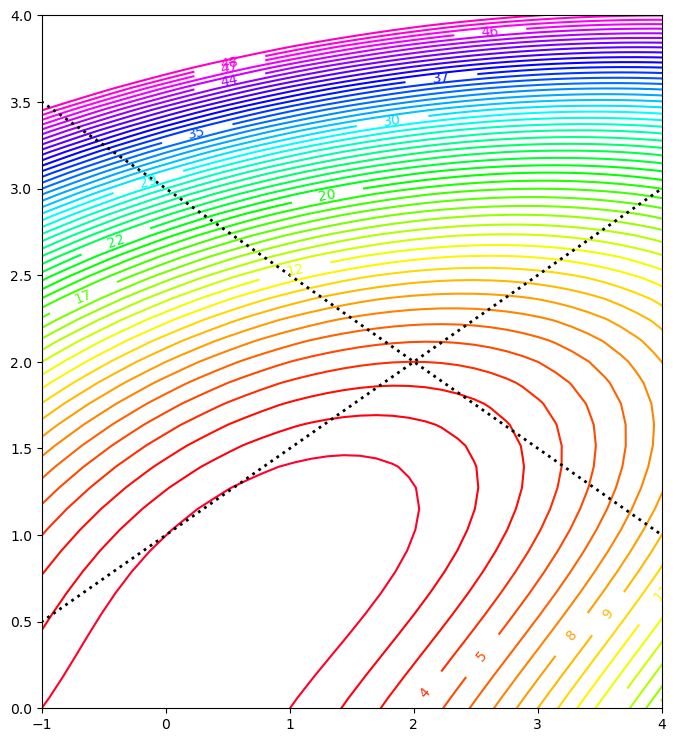

In [27]:
x = np.linspace(-5, 8, 100)
y = np.linspace(-2, 10, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))

fig = plt.figure(figsize=(8,9))
levels = np.arange(1.0,50,1)
cp = plt.contour(X, Y, Z,levels=levels, cmap='gist_rainbow');
plt.clabel(cp)
plt.plot(x, (x+2)/2, 'k:', linewidth=2)
plt.plot(res.x[0],res.x[1],c='r',marker='o')
plt.plot(x, (-x+6)/2, 'k:', linewidth=2)
plt.axis([-1,4,0,4])
plt.show()